In [1]:
import os
from tensorflow.keras.models import load_model
from get_tensor_through_imgs_fn import get_tensor_through_imgs_fn
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

import numpy as np
import csv

# pip3 install pandas
import pandas as pd

  0%|          | 0/792 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 1/792 [00:00<02:12,  5.99it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 792/792 [00:17<00:00, 44.78it/s]


normalized_test_image_tensor.shape : (792, 100, 100, 3)
25/25 [==============================] - 1s 16ms/step
predicted_y.shape : (792, 19)
predicted_labels : ['훼손', '오염', '곰팡이', '오염', '훼손', '훼손', '훼손', '훼손', '훼손', '오타공', '훼손', '오타공', '걸레받이수정', '훼손', '훼손', '오염', '훼손', '훼손', '훼손', '훼손', '꼬임', '훼손', '훼손', '걸레받이수정', '면불량', '훼손', '석고수정', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '오염', '걸레받이수정', '걸레받이수정', '꼬임', '훼손', '몰딩수정', '훼손', '오타공', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '훼손', '오타공', '훼손', '훼손', '오염', '걸레받이수정', '훼손', '훼손', '오타공', '훼손', '터짐', '훼손', '훼손', '훼손', '오염', '걸레받이수정', '훼손', '오염', '훼손', '몰딩수정', '훼손', '훼손', '훼손', '오염', '훼손', '훼손', '훼손', '훼손', '꼬임', '석고수정', '오염', '오타공', '훼손', '훼손', '꼬임', '훼손', '훼손', '걸레받이수정', '훼손', '오염', '오염', '훼손', '훼손', '오염', '훼손', '오타공', '훼손', '오염', '훼손', '훼손', '훼손', '몰딩수정', '오염', '창틀,문틀수정', '가구수정', '훼손', '훼손', '훼손', '오염', '훼손', '오염', '오염', '오염', '훼손', '훼손', '훼손', '터짐', '걸레받이수정', '훼손', '오염', '훼손', '곰팡이', '훼손', '훼손', '훼손', '오염', '훼손', '훼손', '

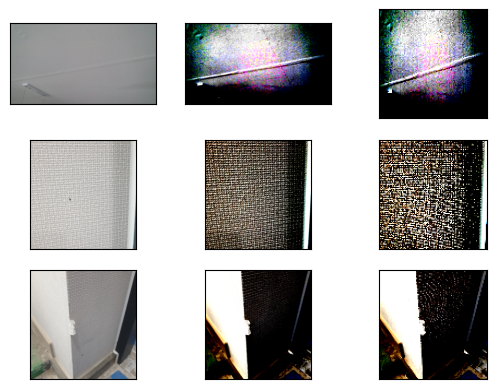

In [2]:
# ========= 테스트 파일로 추론해보기 =========

# 데이콘 리더 보드 점수 => 0.299285797

RESIZED_WIDTH = 100
RESIZED_HEIGHT = 100
MODEL_FILE_NAME = 'model_20230429_101446.h5'

# 추후에 라벨이 추가될 경우 등 확장성 및 모델의 안정성을 고려하여 총 19가지의 하자 유형의 순서가 변경되지 않도록 직접적으로 리스트 생성
DEFECT_TYPE_NAMES = ["가구수정", "걸레받이수정", "곰팡이", "꼬임", "녹오염", "들뜸", "면불량", "몰딩수정", "반점", "석고수정",
                     "오염", "오타공", "울음", "이음부불량", "창틀,문틀수정", "터짐", "틈새과다", "피스", "훼손"]

TEST_FOLDER_PATH = os.path.join(os.getcwd(), os.pardir, os.pardir, 'open', 'test')

test_img_paths = []
test_img_names = os.listdir(TEST_FOLDER_PATH)

for img_name in tqdm(test_img_names):

    img_path = os.path.join(TEST_FOLDER_PATH, img_name)
    test_img_paths.append(img_path)

# print('test_img_paths :', test_img_paths)

fig = plt.figure()

# 792개의 이미지 데이터
test_image_tensor = get_tensor_through_imgs_fn(test_img_paths, RESIZED_HEIGHT, RESIZED_WIDTH, fig)
normalized_test_image_tensor = test_image_tensor / 255
print('normalized_test_image_tensor.shape :',
      normalized_test_image_tensor.shape)


model = load_model(MODEL_FILE_NAME)

predicted_y = model.predict(normalized_test_image_tensor)
print('predicted_y.shape :', predicted_y.shape)

predicted_index_list = np.argmax(predicted_y, axis=1)
# print('predicted_index_list :', predicted_index_list)

predicted_labels = []

for index in predicted_index_list:
    predicted_labels.append(DEFECT_TYPE_NAMES[index])

print('predicted_labels :', predicted_labels)

# 연월일_시간
now = datetime.today().strftime('%Y%m%d_%H%M%S')
predicted_csv = open(f'test_{now}.csv', 'w', newline='', encoding='utf-8')
wr = csv.writer(predicted_csv)
wr.writerow(['id', 'label'])

ids = []
predicted_label_count = len(predicted_labels)

for index in range(predicted_label_count):
    ids.append(f'TEST_{str(index).zfill(3)}')

# [ 'TEST_000', ... ]
# print('ids :', ids)

wr.writerows([*zip(ids, predicted_labels)])
predicted_csv.flush()
predicted_csv.close()

# ===========================================

In [3]:
# ======== 기존 제출 파일과 데이터 비교해보기 ========

PREV_CSV_FILE_NAME = 'test_20230429_023516.csv'
csv = pd.read_csv(PREV_CSV_FILE_NAME)

count = 0
prev_labels = csv['label']

for index in range(len(prev_labels)):

    is_changing = prev_labels[index] != predicted_labels[index]
    if is_changing:
        count += 1

# 달라진 라벨의 개수
print('count :', count)

# ==================================================

count : 312
